In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
from scipy import signal
import sacc
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rc('legend',fontsize=14)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
nsides = np.array([64, 128, 256, 512])
samplers = np.array(['HMC', 'MCLMC', 'MUSE'])

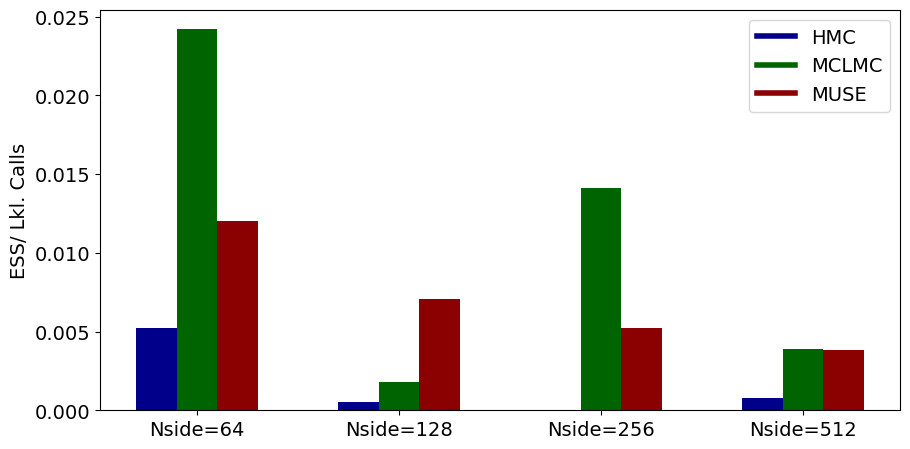

In [3]:
colors  =  ['darkblue', 'darkgreen', 'darkred']
ESS_64  = np.array([0.0052, 0.0242, 0.0120])
ESS_128 = np.array([0.0005, 0.0018, 0.0071])
ESS_256 = np.array([np.NaN, 0.0141, 0.0052])
ESS_512 = np.array([0.0008, 0.0039, 0.0038])

X = np.arange(3)/5
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(X,     ESS_64,  color = colors, width = 0.2)
ax.bar(X + 1, ESS_128, color = colors, width = 0.2)
ax.bar(X + 2, ESS_256, color = colors, width = 0.2)
ax.bar(X + 3, ESS_512, color = colors, width = 0.2)

plt.ylabel("ESS/ Lkl. Calls")
plt.xticks(np.array([X[1], X[1]+1, X[1]+2, X[1]+3]).flatten(),
           np.array([['Nside=64'], ['Nside=128'], ['Nside=256'], ['Nside=512']]).flatten())


custom_lines = [Line2D([0], [0], color='darkblue', lw=4),
                Line2D([0], [0], color='darkgreen', lw=4),
                Line2D([0], [0], color='darkred', lw=4)]
plt.legend(custom_lines, samplers)


In [4]:
HMC_hyperparams_64  = np.load("../summaries/HMC_hyperparams_Nside_64.npz")
MCHMC_hyperparams_64  = np.load("../summaries/MCHMC_hyperparams_Nside_64.npz")
MUSE_hyperparams_64  = np.load("../summaries/MUSE_hyperparams_Nside_64.npz")

MUSE_hyperparams_128  = np.load("../summaries/MUSE_hyperparams_Nside_128.npz")

MCHMC_hyperparams_256 = np.load("../summaries/MCHMC_hyperparams_Nside_256.npz")
MUSE_hyperparams_256  = np.load("../summaries/MUSE_hyperparams_Nside_256.npz")

MUSE_hyperparams_512  = np.load("../summaries/MUSE_hyperparams_Nside_512.npz")

In [5]:
labels_dict = {'r': 'r',
               'Aphi': 'A_{\phi}'}

In [6]:
def make_chain(file, label, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        if param in labels_dict.keys():
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    samples = MCSamples(samples=samples, names=names, labels=labels, label=label,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})    
    print("========")
    return samples
    

In [7]:
HMC_chain_64   = make_chain(HMC_hyperparams_64, 'HMC - Nside=64')
MCHMC_chain_64 = make_chain(MCHMC_hyperparams_64, 'MCHMC - Nside=64')
MUSE_chain_64  = make_chain(MUSE_hyperparams_64, 'MUSE - Nside=64')

MUSE_chain_128 = make_chain(MUSE_hyperparams_128, 'MUSE - Nside=128')

MCHMC_chain_256 = make_chain(MCHMC_hyperparams_256, 'MCHMC - Nside=256')
MUSE_chain_256 = make_chain(MUSE_hyperparams_256, 'MUSE - Nside=256')

MUSE_chain_512 = make_chain(MUSE_hyperparams_512, 'MUSE - Nside=512');

HMC - Nside=64
Removed no burn in
MCHMC - Nside=64
Removed no burn in
MUSE - Nside=64
Removed no burn in
MUSE - Nside=128
Removed no burn in
MCHMC - Nside=256
Removed no burn in
MUSE - Nside=256
Removed no burn in
MUSE - Nside=512
Removed no burn in


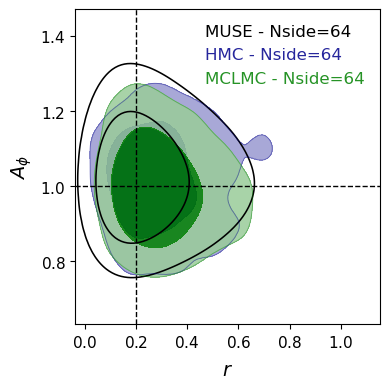

In [8]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_64, HMC_chain_64, MCHMC_chain_64], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True],)
g.add_legend(['MUSE - Nside=64', 'HMC - Nside=64', 'MCLMC - Nside=64'], colored_text=True);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')


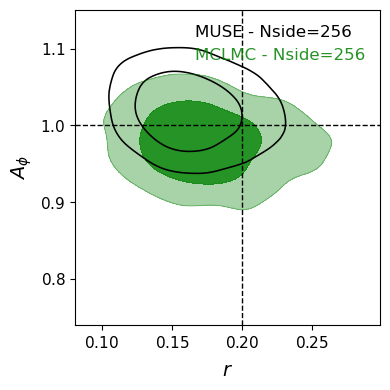

In [9]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_256, #HMC_chain_64,
            MCHMC_chain_256], 'r', 'Aphi', 
           colors=['black', #'darkblue',
                    'green'], ls=['-','-', '-'], 
           filled=[False, True, True],)
g.add_legend(['MUSE - Nside=256', #'HMC - Nside=64',
               'MCLMC - Nside=256'], colored_text=True);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')


In [10]:
true_cls_64  = np.load("../summaries/true_cls_Nside_64.npz")
true_cls_128 = np.load("../summaries/true_cls_Nside_128.npz")
true_cls_256 = np.load("../summaries/true_cls_Nside_256.npz")
true_cls_512 = np.load("../summaries/true_cls_Nside_256.npz")

HMC_cls_64   = np.load("../summaries/HMC_cls_Nside_64.npz")
MCHMC_cls_64 = np.load("../summaries/MCHMC_cls_Nside_64.npz")

MCHMC_cls_256 = np.load("../summaries/MCHMC_cls_Nside_256.npz")

In [11]:
n = np.arange(len(HMC_cls_64["phi_cls_m"]))

/tmp/ipykernel_9539/4016799844.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis[0,0].set_xlim(0, len(true_cls_64["phi_cls_true"]))
/tmp/ipykernel_9539/4016799844.py:33: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis[1,0].set_xlim(0, len(true_cls_64["E_cls_true"]))
/tmp/ipykernel_9539/4016799844.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis[2,0].set_xlim(0, len(true_cls_64["B_cls_true"]))
/tmp/ipykernel_9539/4016799844.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis[0,1].set_xlim(0, len(true_cls_128["phi_cls_true"]))
/tmp/ipykernel_9539/4016799844.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axis[1,1].set_xlim(0, len(true_cls_128["E_cls_true"]))
/tmp/ipykernel_9539/4016799844.py:85: UserWarning: Attempt to set non-positive xlim on a log-scaled axis

ValueError: operands could not be broadcast together with shapes (98,) (102,) 

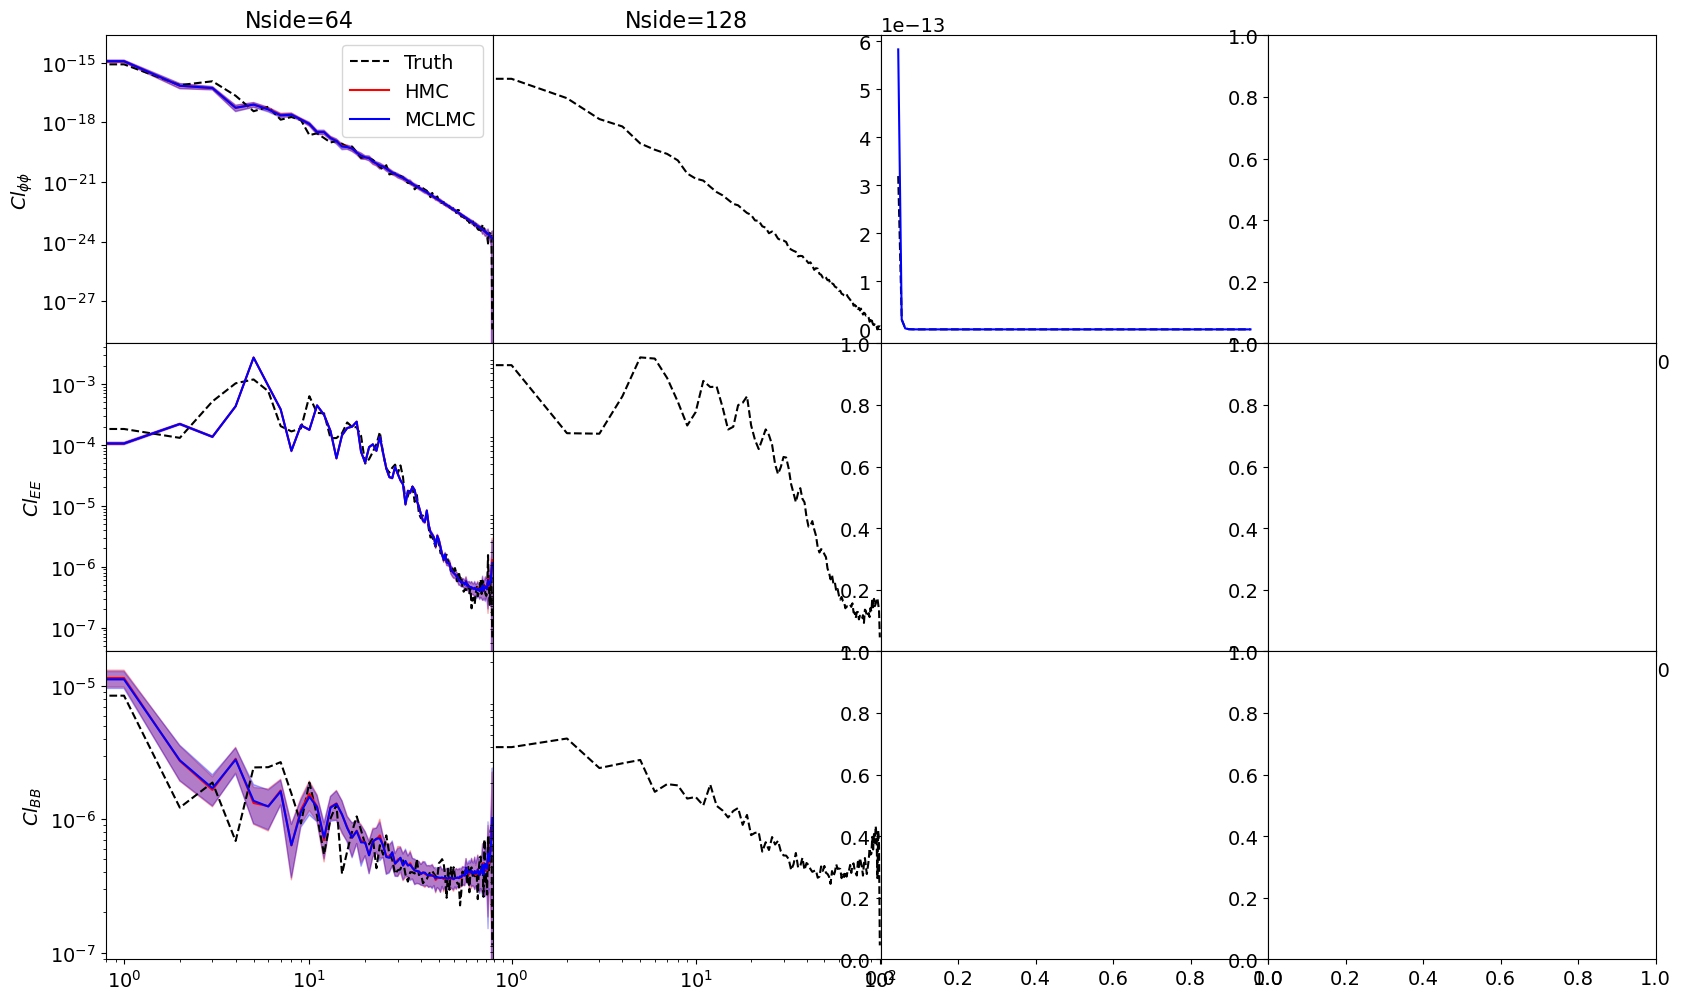

In [12]:
fig, axis = plt.subplots(3, 4, figsize=(20,12))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# Nside=64
axis[0,0].plot(true_cls_64["phi_cls_true"], 'k--', label="Truth")
axis[0,0].plot(HMC_cls_64["phi_cls_m"], 'r-', label="HMC")
axis[0,0].fill_between(n, HMC_cls_64["phi_cls_m"]+HMC_cls_64["phi_cls_s"],
                     HMC_cls_64["phi_cls_m"]-HMC_cls_64["phi_cls_s"], color='r', alpha=.3)
axis[0,0].plot(MCHMC_cls_64["phi_cls_m"], 'b-', label="MCLMC")
axis[0,0].fill_between(n, MCHMC_cls_64["phi_cls_m"]+MCHMC_cls_64["phi_cls_s"],
                     MCHMC_cls_64["phi_cls_m"]-MCHMC_cls_64["phi_cls_s"], color='b', alpha=.3)
axis[0,0].set_title("Nside=64")
axis[0,0].set_xscale('log')
axis[0,0].set_yscale('log')
axis[0,0].set_ylabel(r"$Cl_{\phi \phi}$")
axis[0,0].legend()
axis[0,0].set_xticks([])
axis[0,0].set_xlim(0, len(true_cls_64["phi_cls_true"]))


axis[1,0].plot(true_cls_64["E_cls_true"], 'k--', label="Trurth")
axis[1,0].plot(HMC_cls_64["E_cls_m"], 'r-', label="HMC")
axis[1,0].fill_between(n, HMC_cls_64["E_cls_m"]+HMC_cls_64["E_cls_s"],
                     HMC_cls_64["E_cls_m"]-HMC_cls_64["E_cls_s"], color='r', alpha=.3)
axis[1,0].plot(MCHMC_cls_64["E_cls_m"], 'b-', label="MCLMC")
axis[1,0].fill_between(n, MCHMC_cls_64["E_cls_m"]+MCHMC_cls_64["E_cls_s"],
                     MCHMC_cls_64["E_cls_m"]-MCHMC_cls_64["E_cls_s"], color='b', alpha=.3)
axis[1,0].set_xscale('log')
axis[1,0].set_yscale('log')
axis[1,0].set_ylabel(r"$Cl_{EE}$")
axis[1,0].set_xticks([])
axis[1,0].set_xlim(0, len(true_cls_64["E_cls_true"]))

axis[2,0].plot(true_cls_64["B_cls_true"], 'k--', label="Trurth")
axis[2,0].plot(HMC_cls_64["B_cls_m"], 'r-', label="HMC")
axis[2,0].fill_between(n, HMC_cls_64["B_cls_m"]+HMC_cls_64["B_cls_s"],
                     HMC_cls_64["B_cls_m"]-HMC_cls_64["B_cls_s"], color='r', alpha=.3)
axis[2,0].plot(MCHMC_cls_64["B_cls_m"], 'b-', label="MCLMC")
axis[2,0].fill_between(n, MCHMC_cls_64["B_cls_m"]+MCHMC_cls_64["B_cls_s"],
                     MCHMC_cls_64["B_cls_m"]-MCHMC_cls_64["B_cls_s"], color='b', alpha=.3)
axis[2,0].set_xscale('log')
axis[2,0].set_yscale('log')
axis[2,0].set_ylabel(r"$Cl_{BB}$")
axis[2,0].set_xlim(0, len(true_cls_64["B_cls_true"]))

# Nside=128
axis[0,1].plot(true_cls_128["phi_cls_true"], 'k--', label="Truth")
#axis[0,1].plot(HMC_cls_128["phi_cls_m"], 'r-', label="HMC")
#axis[0,1].fill_between(n, HMC_cls_128["phi_cls_m"]+HMC_cls_128["phi_cls_s"],
#                     HMC_cls_128["phi_cls_m"]-HMC_cls_128["phi_cls_s"], color='r', alpha=.3)
#axis[0,1].plot(MCHMC_cls_128["phi_cls_m"], 'b-', label="MCLMC")
#axis[0,1].fill_between(n, MCHMC_cls_128["phi_cls_m"]+MCHMC_cls_128["phi_cls_s"],
#                     MCHMC_cls_128["phi_cls_m"]-MCHMC_cls_128["phi_cls_s"], color='b', alpha=.3)
axis[0,1].set_title("Nside=128")
axis[0,1].set_xscale('log')
axis[0,1].set_yscale('log')
axis[0,1].set_xticks([])
axis[0,1].set_yticks([])
axis[0,1].set_xlim(0, len(true_cls_128["phi_cls_true"]))

axis[1,1].plot(true_cls_128["E_cls_true"], 'k--', label="Trurth")
#axis[1,1].plot(HMC_cls_128["E_cls_m"], 'r-', label="HMC")
#axis[1,1].fill_between(n, HMC_cls_128["E_cls_m"]+HMC_cls_128["E_cls_s"],
#                     HMC_cls_128["E_cls_m"]-HMC_cls_128["E_cls_s"], color='r', alpha=.3)
#axis[1,1].plot(MCHMC_cls_128["E_cls_m"], 'b-', label="MCLMC")
#axis[1,1].fill_between(n, MCHMC_cls_128["E_cls_m"]+MCHMC_cls_128["E_cls_s"],
#                     MCHMC_cls_128["E_cls_m"]-MCHMC_cls_128["E_cls_s"], color='b', alpha=.3)
axis[1,1].set_xscale('log')
axis[1,1].set_yscale('log')
axis[1,1].set_xticks([])
axis[1,1].set_yticks([])
axis[1,1].set_xlim(0, len(true_cls_128["E_cls_true"]))

axis[2,1].plot(true_cls_128["B_cls_true"], 'k--', label="Trurth")
#axis[2,1].plot(HMC_cls_128["B_cls_m"], 'r-', label="HMC")
#axis[2,1].fill_between(n, HMC_cls_128["B_cls_m"]+HMC_cls_128["B_cls_s"],
#                     HMC_cl_128["B_cls_m"]-HMC_cls_128["B_cls_s"], color='r', alpha=.3)
#axis[2,1].plot(MCHMC_cls_128["B_cls_m"], 'b-', label="MCLMC")
#axis[2,1].fill_between(n, MCHMC_cls_128["B_cls_m"]+MCHMC_cls_128["B_cls_s"],
#                     MCHMC_cls_128["B_cls_m"]-MCHMC_cls_128["B_cls_s"], color='b', alpha=.3)
axis[2,1].set_xscale('log')
axis[2,1].set_yscale('log')
axis[2,1].set_yticks([])
axis[2,1].set_xlim(0, len(true_cls_128["B_cls_true"]))

# Nside=256
axis[0,2].plot(true_cls_256["phi_cls_true"], 'k--', label="Truth")
#axis[0,2].plot(HMC_cls_256["phi_cls_m"], 'r-', label="HMC")
#axis[0,2].fill_between(n, HMC_cls_256["phi_cls_m"]+HMC_cls_256["phi_cls_s"],
#                     HMC_cls_256["phi_cls_m"]-HMC_cls_256["phi_cls_s"], color='r', alpha=.3)
axis[0,2].plot(MCHMC_cls_256["phi_cls_m"], 'b-', label="MCLMC")
axis[0,2].fill_between(n, MCHMC_cls_256["phi_cls_m"]+MCHMC_cls_256["phi_cls_s"],
                     MCHMC_cls_256["phi_cls_m"]-MCHMC_cls_256["phi_cls_s"], color='b', alpha=.3)
axis[0,2].set_title("Nside=256")
axis[0,2].set_xscale('log')
axis[0,2].set_yscale('log')
axis[0,2].set_xticks([])
axis[0,2].set_yticks([])
axis[0,2].set_xlim(0, len(true_cls_256["phi_cls_true"]))

axis[1,2].plot(true_cls_256["E_cls_true"], 'k--', label="Trurth")
#axis[1,2].plot(HMC_cls_256["E_cls_m"], 'r-', label="HMC")
#axis[1,2].fill_between(n, HMC_cls_256["E_cls_m"]+HMC_cls_256["E_cls_s"],
#                     HMC_cls_256["E_cls_m"]-HMC_cls_256["E_cls_s"], color='r', alpha=.3)
axis[1,2].plot(MCHMC_cls_256["E_cls_m"], 'b-', label="MCLMC")
axis[1,2].fill_between(n, MCHMC_cls_256["E_cls_m"]+MCHMC_cls_256["E_cls_s"],
                     MCHMC_cls_256["E_cls_m"]-MCHMC_cls_256["E_cls_s"], color='b', alpha=.3)
axis[1,2].set_xscale('log')
axis[1,2].set_yscale('log')
axis[1,2].set_xticks([])
axis[1,2].set_yticks([])
axis[1,2].set_xlim(0, len(true_cls_256["E_cls_true"]))

axis[2,2].plot(true_cls_256["B_cls_true"], 'k--', label="Trurth")
#axis[2,2].plot(HMC_cls_256["B_cls_m"], 'r-', label="HMC")
#axis[2,2].fill_between(n, HMC_cls_256["B_cls_m"]+HMC_cls_256["B_cls_s"],
#                     HMC_cls_256["B_cls_m"]-HMC_cls_256["B_cls_s"], color='r', alpha=.3)
axis[2,2].plot(MCHMC_cls_256["B_cls_m"], 'b-', label="MCLMC")
axis[2,2].fill_between(n, MCHMC_cls_256["B_cls_m"]+MCHMC_cls_256["B_cls_s"],
                     MCHMC_cls_256["B_cls_m"]-MCHMC_cls_256["B_cls_s"], color='b', alpha=.3)
axis[2,2].set_xscale('log')
axis[2,2].set_yscale('log')
axis[2,2].set_yticks([])
axis[2,2].set_xlim(0, len(true_cls_256["B_cls_true"]))

# Nside=512
axis[0,3].plot(true_cls_512["phi_cls_true"], 'k--', label="Truth")
#xis[0,3].plot(HMC_cls_512["phi_cls_m"], 'r-', label="HMC")
#axis[0,3].fill_between(n, HMC_cls_512["phi_cls_m"]+HMC_cls_512["phi_cls_s"],
#                     HMC_cls_512["phi_cls_m"]-HMC_cls_512["phi_cls_s"], color='r', alpha=.3)
#axis[0,3].plot(MCHMC_cls_512["phi_cls_m"], 'b-', label="MCLMC")
#axis[0,3].fill_between(n, MCHMC_cls_512["phi_cls_m"]+MCHMC_cls_512["phi_cls_s"],
#                     MCHMC_cls_512["phi_cls_m"]-MCHMC_cls_512["phi_cls_s"], color='b', alpha=.3)
axis[0,3].set_title("Nside=512")
axis[0,3].set_xscale('log')
axis[0,3].set_yscale('log')
axis[0,3].set_xticks([])
axis[0,3].set_yticks([])
axis[0,3].set_xlim(0, len(true_cls_512["phi_cls_true"]))


axis[1,3].plot(true_cls_512["E_cls_true"], 'k--', label="Trurth")
#axis[1,3].plot(HMC_cls_512["E_cls_m"], 'r-', label="HMC")
#axis[1,3].fill_between(n, HMC_cls_512["E_cls_m"]+HMC_cls_512["E_cls_s"],
#                     HMC_cls_512["E_cls_m"]-HMC_cls_512["E_cls_s"], color='r', alpha=.3)
#axis[1,3].plot(MCHMC_cls_512["E_cls_m"], 'b-', label="MCLMC")
#axis[1,3].fill_between(n, MCHMC_cls_512["E_cls_m"]+MCHMC_cls_512["E_cls_s"],
#                     MCHMC_cls_512["E_cls_m"]-MCHMC_cls_512["E_cls_s"], color='b', alpha=.3)
axis[1,3].set_xscale('log')
axis[1,3].set_yscale('log')
axis[1,3].set_xticks([])
axis[1,3].set_yticks([])
axis[1,3].set_xlim(0, len(true_cls_512["E_cls_true"]))

axis[2,3].plot(true_cls_512["B_cls_true"], 'k--', label="Trurth")
#axis[2,3].plot(HMC_cls_512["B_cls_m"], 'r-', label="HMC")
#axis[2,3].fill_between(n, HMC_cls_512["B_cls_m"]+HMC_cls_512["B_cls_s"],
#                     HMC_cls_512["B_cls_m"]-HMC_cls_512["B_cls_s"], color='r', alpha=.3)
#axis[2,3].plot(MCHMC_cls_512["B_cls_m"], 'b-', label="MCLMC")
#axis[2,3].fill_between(n, MCHMC_cls_512["B_cls_m"]+MCHMC_cls_512["B_cls_s"],
#                     MCHMC_cls_512["B_cls_m"]-MCHMC_cls_512["B_cls_s"], color='b', alpha=.3)
axis[2,3].set_xscale('log')
axis[2,3].set_yscale('log')
axis[2,3].set_yticks([])
axis[2,3].set_xlim(0, len(true_cls_512["B_cls_true"]))
plt.show()